In [1]:
# Importing python packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os 

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

# controls default text sizes
plt.rc('lines',markersize=8)
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
# Importing files
REPO = 'viscosity_liquid_transfer_Pablo'
folder = os.getcwd().split(REPO)[0]+REPO+r'\Opentrons_experiments\\BOTorch_optimization\\VS_code_csv\\'
std = '204'


In [13]:
#Load data frame
folder1 = os.getcwd().split(REPO)[0]+REPO+r'\Opentrons_experiments\\Std_calibrations\\'
df_man = pd.read_csv(folder1+r'\Viscosity_std_'+std+'.csv')

df_man=df_man.drop_duplicates(subset=["volume","aspiration_rate","dispense_rate","blow_out_rate","delay_aspirate","delay_dispense","delay_blow_out","touch_tip_aspirate","touch_tip_dispense"], keep='first')
df_man['time_for_1000']=0
for i in range(len(df_man)):
    if (df_man['blow_out_rate'].iloc[i])<=0:
        df_man['time_for_1000'].iloc[i] = 1000/df_man["aspiration_rate"].iloc[i] + 1000/df_man["dispense_rate"].iloc[i] + df_man["delay_aspirate"].iloc[i] + df_man["delay_dispense"].iloc[i] + df_man["delay_blow_out"].iloc[i]
    else:
        df_man['time_for_1000'].iloc[i] = 1000/df_man["aspiration_rate"].iloc[i] + 1000/df_man["dispense_rate"].iloc[i] + 150/df_man["blow_out_rate"].iloc[i] + df_man["delay_aspirate"].iloc[i] + df_man["delay_dispense"].iloc[i] + df_man["delay_blow_out"].iloc[i]
df_man.reset_index(drop=True)

df_man['iteration']= None
counter= 1
for row in df_man.drop_duplicates(["aspiration_rate","dispense_rate","blow_out_rate","delay_aspirate","delay_dispense","delay_blow_out","touch_tip_aspirate","touch_tip_dispense"]).iterrows():
    df_repeat = df_man.loc[:,["aspiration_rate","dispense_rate","blow_out_rate","delay_aspirate","delay_dispense","delay_blow_out","touch_tip_aspirate","touch_tip_dispense"]]== row[1].loc[["aspiration_rate","dispense_rate","blow_out_rate","delay_aspirate","delay_dispense","delay_blow_out","touch_tip_aspirate","touch_tip_dispense"]]
    index = df_repeat.where(df_repeat.sum(axis=1)==8).dropna().index
    df_man.loc[index,'iteration']=counter
    counter+=1
df_man = df_man.sort_values('iteration')
df_man

#Calcualte means
df_duplicates = df_man.where(df_man.duplicated('iteration',keep=False)==True).dropna(how='all')
df_incomplete = df_man.where(df_man.duplicated('iteration',keep=False)==False).dropna(how='all')
df_mean = pd.DataFrame(columns= df_man.columns)

for index,values in df_duplicates.drop_duplicates(['aspiration_rate','dispense_rate']).iterrows():
    if len(df_duplicates.loc[index:index+2]) == 3:
        mean_error =df_duplicates.loc[index:index+2,'%error'].mean()
        df_duplicates.loc[index,'%error'] = mean_error
        df_duplicates.loc[index, 'volume'] ='mean'+str([300, 500, 1000])
        df_mean = pd.concat([df_mean,df_man.loc[index:index+2],df_duplicates.loc[[index]]])
    else:
        df_incomplete = pd.concat([df_incomplete,df_duplicates.loc[index:index+2]]).drop_duplicates()
df_mean = pd.concat([df_mean,df_incomplete])
df_mean = df_mean.sort_values('iteration')
#df_man = df_mean.reset_index(drop=True)   
"""
#Calculate iteration 
counter =1 
for row in df_man.drop_duplicates(['aspiration_rate','dispense_rate']).iterrows():
    df_repeat = df_man.loc[:,['aspiration_rate','dispense_rate']]== row[1].loc[['aspiration_rate','dispense_rate']]
    index = df_repeat.where(df_repeat.sum(axis=1)==2).dropna().index
    df_man.loc[index,'iteration']=counter
    counter+=1
"""

C:\Users\Shivam\AppData\Local\Temp\ipykernel_20216\2900878628.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_man['time_for_1000'].iloc[i] = 1000/df_man["aspiration_rate"].iloc[i] + 1000/df_man["dispense_rate"].iloc[i] + df_man["delay_aspirate"].iloc[i] + df_man["delay_dispense"].iloc[i] + df_man["delay_blow_out"].iloc[i]


"\n#Calculate iteration \ncounter =1 \nfor row in df_man.drop_duplicates(['aspiration_rate','dispense_rate']).iterrows():\n    df_repeat = df_man.loc[:,['aspiration_rate','dispense_rate']]== row[1].loc[['aspiration_rate','dispense_rate']]\n    index = df_repeat.where(df_repeat.sum(axis=1)==2).dropna().index\n    df_man.loc[index,'iteration']=counter\n    counter+=1\n"

In [15]:
df_mean

,liquid,Viscosity 900 s-1,Viscosity 100 s-1,Viscosity 10 s-1,pipette,volume,aspiration_rate,dispense_rate,blow_out_rate,delay_aspirate,delay_dispense,delay_blow_out,touch_tip_aspirate,touch_tip_dispense,time,%error,m_measured,m_expected,time_for_1000,iteration
0,Viscosity_std_204.8,204.8,204.8,204.8,p1000,1000.0,70.0,70.0,0.0,0.0,0.0,0.0,True,False,34.215777,-10.313694,0.7748,0.86390,28.571429,1
1,Viscosity_std_204.8,204.8,204.8,204.8,p1000,1000.0,70.0,70.0,5.0,0.0,0.0,0.0,True,False,60.686448,-0.266235,0.8616,0.86390,58.571429,2
3,Viscosity_std_204.8,204.8,204.8,204.8,p1000,1000.0,68.0,70.0,5.0,0.0,0.0,0.0,True,False,61.887612,-3.623105,0.8326,0.86390,58.991597,3
4,Viscosity_std_204.8,204.8,204.8,204.8,p1000,1000.0,70.0,70.0,5.0,5.0,0.0,0.0,True,False,66.569751,2.859127,0.8886,0.86390,63.571429,4
5,Viscosity_std_204.8,204.8,204.8,204.8,p1000,1000.0,70.0,70.0,5.0,2.5,0.0,0.0,True,False,64.114524,0.972335,0.8723,0.86390,61.071429,5
7,Viscosity_std_204.8,204.8,204.8,204.8,p1000,1000.0,70.0,70.0,5.0,2.0,0.0,0.0,True,False,63.622335,2.106725,0.8821,0.86390,60.571429,6
8,Viscosity_std_204.8,204.8,204.8,204.8,p1000,1000.0,70.0,70.0,5.0,1.5,0.0,0.0,True,False,63.215145,1.597407,0.8777,0.86390,60.071429,7
9,Viscosity_std_204.8,204.8,204.8,204.8,p1000,1000.0,70.0,70.0,5.0,1.0,0.0,0.0,True,False,62.691491,0.150480,0.8652,0.86390,59.571429,8
11,Viscosity_std_204.8,204.8,204.8,204.8,p1000,500.0,70.0,70.0,5.0,1.0,0.0,0.0,True,False,48.440264,5.614076,0.4562,0.43195,59.571429,8
16,Viscosity_std_204.8,204.8,204.8,204.8,p1000,300.0,70.0,70.0,5.0,0.7,0.0,0.0,True,False,42.170530,3.407030,0.2680,0.25917,59.271429,10


In [20]:
#Load dataframe
df_exp2 = pd.read_csv(folder+r'\Viscosity_std_'+std+'_3_vol_opt.csv')

#Calculate iterations
counter =int(1) 
for i in range(0,len(df_exp2)+1,3):
    if len(df_exp2.loc[i:i+2,'volume'].drop_duplicates())==1:
        df_exp2.loc[i,'iteration']=int(counter)
        counter+=1    
        df_exp2.loc[i+1,'iteration']=int(counter)
        counter+=1  
        df_exp2.loc[i+2,'iteration']=int(counter)
        counter+=1          
    else:
        df_exp2.loc[i:i+2,'iteration']=int(counter)
        counter+=1



In [21]:
df_exp2

,liquid,pipette,volume,aspiration_rate,dispense_rate,blow_out_rate,delay_aspirate,delay_dispense,delay_blow_out,%error,time_asp_1000,acq_value,iteration
0,Viscosity_std_204,p1000,1000.0,89.911952,89.911952,0,5,5,0,-10.047459,32.243984,NaN,1.0
1,Viscosity_std_204,p1000,500.0,89.911952,89.911952,0,5,5,0,-5.313115,32.243984,NaN,1.0
2,Viscosity_std_204,p1000,300.0,89.911952,89.911952,0,5,5,0,-5.698962,32.243984,NaN,1.0
3,Viscosity_std_204,p1000,1000.0,112.389940,8.991195,0,5,5,0,2.812826,130.117512,NaN,2.0
4,Viscosity_std_204,p1000,500.0,112.389940,8.991195,0,5,5,0,4.734344,130.117512,NaN,2.0
5,Viscosity_std_204,p1000,300.0,112.389940,8.991195,0,5,5,0,3.599954,130.117512,NaN,2.0
6,Viscosity_std_204,p1000,1000.0,112.389940,112.389940,0,5,5,0,-12.026855,27.795187,NaN,3.0
7,Viscosity_std_204,p1000,500.0,112.389940,112.389940,0,5,5,0,-7.211483,27.795187,NaN,3.0
8,Viscosity_std_204,p1000,300.0,112.389940,112.389940,0,5,5,0,-4.232743,27.795187,NaN,3.0
9,Viscosity_std_204,p1000,1000.0,8.991195,112.389940,0,5,5,0,-11.193425,130.117512,NaN,4.0


In [22]:
#Load data frame
df_exp3 = pd.read_csv(folder+r'\Viscosity_std_'+std+'_exp3_withacq.csv')

#Calculate iteration number
counter =1 
for row in df_exp3.drop_duplicates(['aspiration_rate','dispense_rate']).iterrows():
    df_repeat = df_exp3.loc[:,['aspiration_rate','dispense_rate']]== row[1].loc[['aspiration_rate','dispense_rate']]
    index = df_repeat.where(df_repeat.sum(axis=1)==2).dropna().index
    df_exp3.loc[index,'iteration']=int(counter)
    counter+=1

#Edit volumes to be all the same 
volumes = ['1000.0','500.0','300.0']
for volume in volumes:
    index = df_exp3.where(df_exp3.volume==volume).dropna(how='all').index
    df_exp3.loc[index,'volume'] = volume[:-2]

#Recalculate mean
for i in range(3,len(df_exp3),4):
    df_exp3.loc[i,'%error'] = df_exp3.loc[i-3:i,'%error'].mean()




In [23]:
df_exp3

,liquid,pipette,volume,aspiration_rate,dispense_rate,blow_out_rate,delay_aspirate,delay_dispense,delay_blow_out,%error,time_asp_1000,acq_value,iteration
0,Viscosity_std_204,p1000,1000,89.911952,89.911952,0,5,5,0,-10.047459,32.243984,NaN,1.0
1,Viscosity_std_204,p1000,500,89.911952,89.911952,0,5,5,0,-5.313115,32.243984,NaN,1.0
2,Viscosity_std_204,p1000,300,89.911952,89.911952,0,5,5,0,-5.698962,32.243984,NaN,1.0
3,Viscosity_std_204,p1000,"mean[300, 500, 1000]",89.911952,89.911952,0,5,5,0,-7.019845,32.243984,NaN,1.0
4,Viscosity_std_204,p1000,1000,112.389940,8.991195,0,5,5,0,2.812826,130.117512,NaN,2.0
5,Viscosity_std_204,p1000,500,112.389940,8.991195,0,5,5,0,4.734344,130.117512,NaN,2.0
6,Viscosity_std_204,p1000,300,112.389940,8.991195,0,5,5,0,3.599954,130.117512,NaN,2.0
7,Viscosity_std_204,p1000,"mean[300, 500, 1000]",112.389940,8.991195,0,5,5,0,1.857854,130.117512,NaN,2.0
8,Viscosity_std_204,p1000,1000,112.389940,112.389940,0,5,5,0,-12.026855,27.795187,NaN,3.0
9,Viscosity_std_204,p1000,500,112.389940,112.389940,0,5,5,0,-7.211483,27.795187,NaN,3.0


#### Plot for exp2 and manual calibration

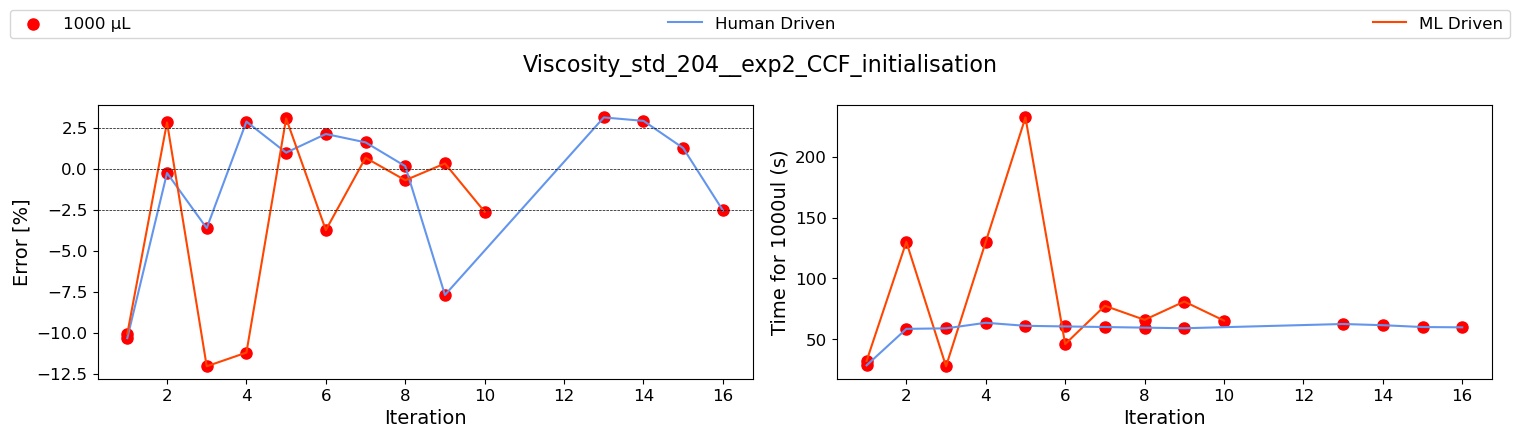

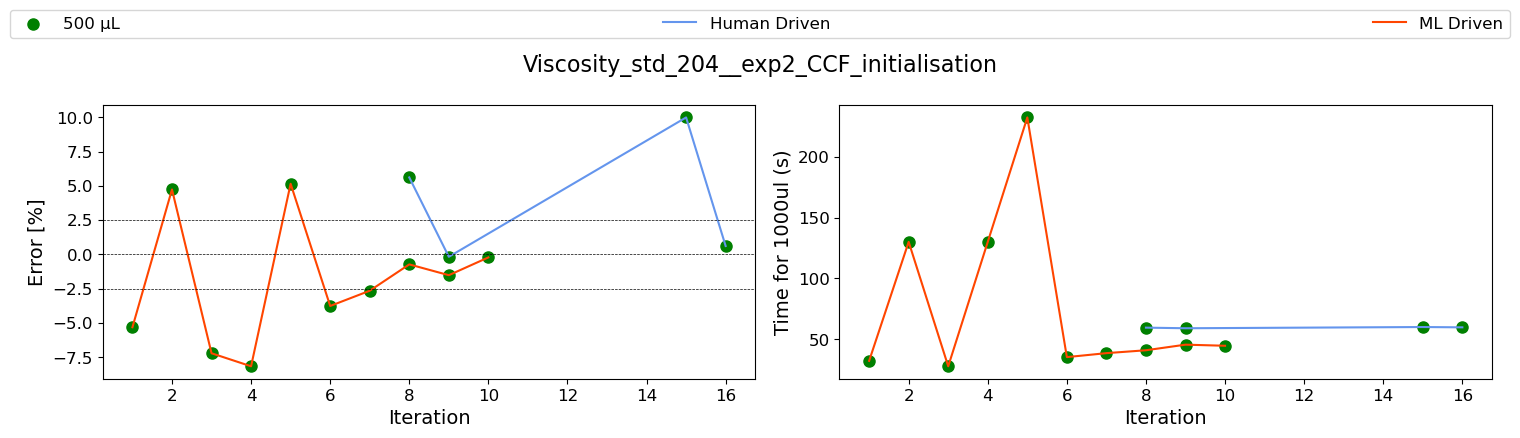

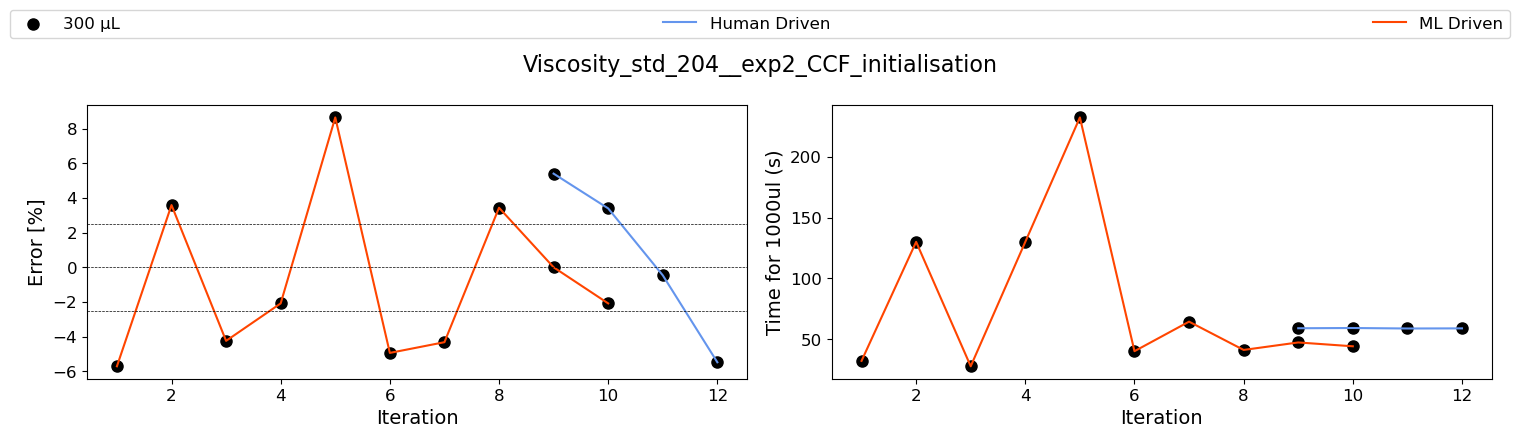

In [25]:
#Makes a figure with manual and ML calibrations, one per volume

for volume in [1000,500,300]:
    df_exp2_plot = df_exp2.where(df_exp2.volume==volume).dropna(how='all').copy()
    df_man_plot = df_man.where(df_man.volume==volume).dropna(how='all').copy()
    #Making subplots (2 rows, 1 column)
    fig,axs = plt.subplots(1,2)

    # Plotting graph 1: Iteration against error
    if volume == 1000:
        color = 'red'
    elif volume== 500:
        color = 'green'
    elif volume ==300:
        color = 'black'    
    
    if len(df_man) != 0:
        axs.flatten()[0].scatter(df_man_plot['iteration'],df_man_plot['%error'], marker= 'o', label = str(volume)+u' \u03bcL', c = color)
        axs.flatten()[0].plot(df_man_plot['iteration'],df_man_plot['%error'], label = 'Human Driven', c = 'cornflowerblue')
   
    if len(df_exp2) != 0:
        axs.flatten()[0].scatter(df_exp2_plot['iteration'],df_exp2_plot['%error'], marker= 'o', c = color)
        axs.flatten()[0].plot(df_exp2_plot['iteration'],df_exp2_plot['%error'], label = 'ML Driven', c = 'orangered')
    
    
    axs.flatten()[0].axhline(y=0, ls = '--', color = 'black', linewidth=0.5)
    axs.flatten()[0].axhline(y=2.5, ls = '--', color = 'black', linewidth=0.5)
    axs.flatten()[0].axhline(y=-2.5, ls = '--', color = 'black', linewidth=0.5)
    axs.flatten()[0].set_xlabel('Iteration')
    axs.flatten()[0].set_ylabel('Error [%]')



    axs.flatten()[1].scatter(df_exp2_plot['iteration'],df_exp2_plot['time_asp_1000'], marker= 'o', c = color)
    axs.flatten()[1].plot(df_exp2_plot['iteration'],df_exp2_plot['time_asp_1000'],  c = 'orangered')

    axs.flatten()[1].scatter(df_man_plot['iteration'],df_man_plot['time_for_1000'], marker= 'o', c = color)
    axs.flatten()[1].plot(df_man_plot['iteration'],df_man_plot['time_for_1000'], c = 'cornflowerblue')


    axs.flatten()[1].set_xlabel('Iteration')
    axs.flatten()[1].set_ylabel('Time for 1000ul (s)')

    fig.set_size_inches(15, 4)
    fig.suptitle('Viscosity_std_'+std+'_'+'_exp2_CCF_initialisation')
    fig.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=5, mode="expand", borderaxespad=0.)
    fig.tight_layout()

    REPO = 'viscosity_liquid_transfer_Pablo'
    #folder = os.getcwd().split(REPO)[0]+REPO+r'\Sartorious_experiments\Finalised_Data'
    # fig.savefig(folder+r'/'+'Viscosity_std_'+std+'_exp2_line.png')

C:\Users\Shivam\AppData\Local\Temp\ipykernel_20216\3496789255.py:30: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  axs.flatten()[0].scatter(df_man_1000.where(df_man_1000['iteration']==df_man_mean_min_iteration_df).dropna()['iteration'],df_man_1000.where(df_man_1000['iteration']==df_man_mean_min_iteration_df).dropna()['%error'], marker= 'x', c = 'red')
C:\Users\Shivam\AppData\Local\Temp\ipykernel_20216\3496789255.py:30: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  axs.flatten()[0].scatter(df_man_1000.where(df_man_1000['iteration']==df_man_mean_min_iteration_df).dropna()['iteration'],df_man_1000.where(df_man_1000['iteration']==df_man_mean_min_iter

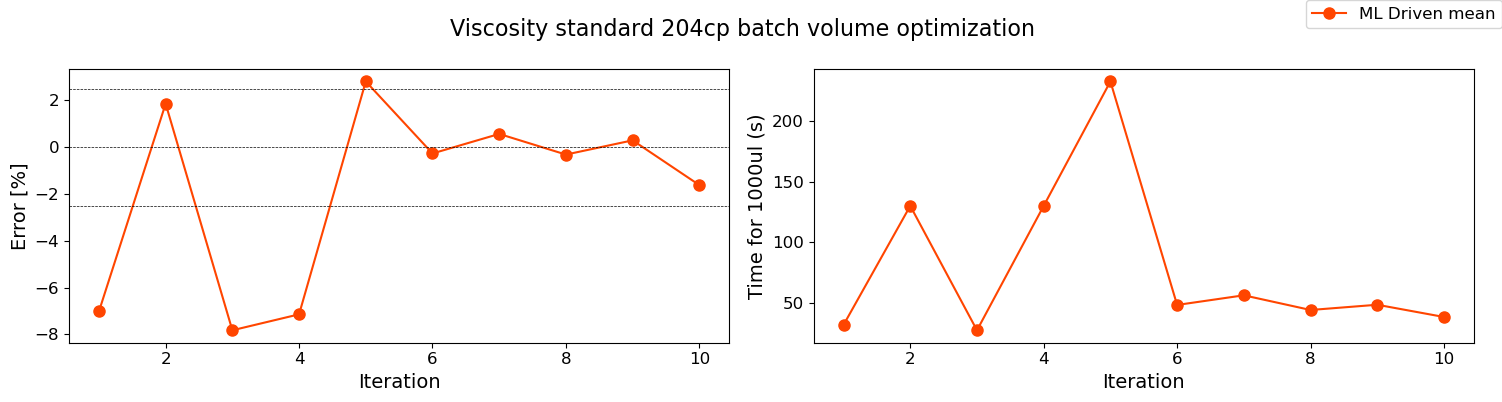

In [49]:
#Making subplots (2 rows, 2 column)
fig,axs = plt.subplots(1,2)

# Dropping NAN rows
df_man_1000 = df_man.where(df_man.volume==1000).dropna(how='all')
df_man_500 = df_man.where(df_man.volume==500).dropna(how='all')
df_man_300 = df_man.where(df_man.volume==300).dropna(how='all')
df_man_100 = df_man.where(df_man.volume==100).dropna(how='all')
df_man_mean = df_man.where(df_man.volume=='mean[300, 500, 1000]').dropna(how='all')


df_exp3_1000 = df_exp3.where(df_exp3.volume=='1000').dropna(how='all')
df_exp3_500 = df_exp3.where(df_exp3.volume=='500').dropna(how='all')
df_exp3_300 = df_exp3.where(df_exp3.volume=='300').dropna(how='all')
df_exp3_100 = df_exp3.where(df_exp3.volume=='100').dropna(how='all')
df_exp3_mean = df_exp3.where(df_exp3.volume=='mean[300, 500, 1000]').dropna(how='all')

#find min error

df_exp3_mean_min_iteration = df_exp3_mean[['iteration','%error']].abs().sort_values('%error').iloc[0:3,0].copy()
df_exp3_mean_min_iteration_df = pd.DataFrame(data=df_exp3_mean_min_iteration)
df_man_mean_min_iteration = df_man_mean[['iteration','%error']].abs().sort_values('%error').iloc[0:3,0].copy()
df_man_mean_min_iteration_df = pd.DataFrame(data=df_man_mean_min_iteration)

# Plotting graph 1: Iteration against error
if len(df_man_mean) != 0:
    axs.flatten()[0].plot(df_man_mean['iteration'],df_man_mean['%error'],marker= 'o', label = 'Human Driven mean', c = 'cornflowerblue')

if len(df_man_1000) != 0:
    axs.flatten()[0].scatter(df_man_1000.where(df_man_1000['iteration']==df_man_mean_min_iteration_df).dropna()['iteration'],df_man_1000.where(df_man_1000['iteration']==df_man_mean_min_iteration_df).dropna()['%error'], marker= 'x', c = 'red')

if len(df_man_500) != 0:
    axs.flatten()[0].scatter(df_man_500.where(df_man_500['iteration']==df_man_mean_min_iteration_df).dropna()['iteration'],df_man_500.where(df_man_500['iteration']==df_man_mean_min_iteration_df).dropna()['%error'], marker= 'x', c = 'green')

if len(df_man_300) != 0:
    axs.flatten()[0].scatter(df_man_300.where(df_man_300['iteration']==df_man_mean_min_iteration_df).dropna()['iteration'],df_man_300.where(df_man_300['iteration']==df_man_mean_min_iteration_df).dropna()['%error'], marker= 'x', c = 'black')


if len(df_exp3_mean) != 0:
    axs.flatten()[0].plot(df_exp3_mean['iteration'],df_exp3_mean['%error'],marker= 'o', label='ML Driven mean',c = 'orangered')


if len(df_exp3_1000) != 0:
    axs.flatten()[0].scatter(df_exp3_1000.where(df_exp3_1000['iteration']==df_exp3_mean_min_iteration_df).dropna()['iteration'],df_exp3_1000.where(df_exp3_1000['iteration']==df_exp3_mean_min_iteration_df).dropna()['%error'], marker= 'x', c = 'red')


if len(df_exp3_500) != 0:
    axs.flatten()[0].scatter(df_exp3_500.where(df_exp3_500['iteration']==df_exp3_mean_min_iteration_df).dropna()['iteration'],df_exp3_500.where(df_exp3_500['iteration']==df_exp3_mean_min_iteration_df).dropna()['%error'], marker= 'x', c = 'green')

if len(df_exp3_300) != 0:
    axs.flatten()[0].scatter(df_exp3_300.where(df_exp3_300['iteration']==df_exp3_mean_min_iteration_df).dropna()['iteration'],df_exp3_300.where(df_exp3_300['iteration']==df_exp3_mean_min_iteration_df).dropna()['%error'], marker= 'x', c = 'black')

for i in range(len(axs.flatten())-1):
    axs.flatten()[i].axhline(y=0, ls = '--', color = 'black', linewidth=0.5)
    axs.flatten()[i].axhline(y=2.5, ls = '--', color = 'black', linewidth=0.5)
    axs.flatten()[i].axhline(y=-2.5, ls = '--', color = 'black', linewidth=0.5)
    axs.flatten()[i].set_xlabel('Iteration')
    axs.flatten()[i].set_ylabel('Error [%]')



if len(df_exp3_mean) != 0:
    axs.flatten()[1].plot(df_exp3_mean['iteration'],df_exp3_mean['time_asp_1000'], marker ='o', c = 'orangered')


#axs.flatten()[1].plot(df_man_mean['iteration'],df_man_1000['time_for_1000'], marker= 'o', c = 'cornflowerblue')

axs.flatten()[1].set_xlabel('Iteration')
axs.flatten()[1].set_ylabel('Time for 1000ul (s)')

fig.set_size_inches(15, 4)
fig.suptitle('Viscosity standard '+str(std)+ 'cp batch volume optimization')
fig.legend( loc='upper right',ncol=1, borderaxespad=0.)
fig.tight_layout()

REPO = 'viscosity_liquid_transfer_Pablo'
folder = os.getcwd().split(REPO)[0]+REPO+r'\Sartorious_experiments\Finalised_Data'
# fig.savefig(folder+r'/'+'Viscosity_std_'+std+'_exp2_line.png')





In [ ]:
df_exp3_500.where(df_exp3_500['iteration']==df_exp3_mean_min_iteration)

In [31]:
df_exp3_mean

,liquid,pipette,volume,aspiration_rate,dispense_rate,blow_out_rate,delay_aspirate,delay_dispense,delay_blow_out,%error,time_asp_1000,acq_value,iteration
3,Viscosity_std_204,p1000,"mean[300, 500, 1000]",89.911952,89.911952,0.0,5.0,5.0,0.0,-7.019845,32.243984,NaN,1.0
7,Viscosity_std_204,p1000,"mean[300, 500, 1000]",112.389940,8.991195,0.0,5.0,5.0,0.0,1.857854,130.117512,NaN,2.0
11,Viscosity_std_204,p1000,"mean[300, 500, 1000]",112.389940,112.389940,0.0,5.0,5.0,0.0,-7.823694,27.795187,NaN,3.0
15,Viscosity_std_204,p1000,"mean[300, 500, 1000]",8.991195,112.389940,0.0,5.0,5.0,0.0,-7.142030,130.117512,NaN,4.0
19,Viscosity_std_204,p1000,"mean[300, 500, 1000]",8.991195,8.991195,0.0,5.0,5.0,0.0,2.810253,232.439837,NaN,5.0
23,Viscosity_std_204,p1000,"mean[300, 500, 1000]",98.504223,35.123162,0.0,5.0,5.0,0.0,-0.267521,48.623090,11.030108,6.0
27,Viscosity_std_204,p1000,"mean[300, 500, 1000]",78.136789,29.618935,0.0,5.0,5.0,0.0,0.567195,56.560255,12.460163,7.0
31,Viscosity_std_204,p1000,"mean[300, 500, 1000]",93.316186,42.075689,0.0,5.0,5.0,0.0,-0.315108,44.482948,11.431273,8.0
35,Viscosity_std_204,p1000,"mean[300, 500, 1000]",89.826762,36.155147,0.0,5.0,5.0,0.0,0.293244,48.791119,5.187350,9.0
39,Viscosity_std_204,p1000,"mean[300, 500, 1000]",110.673791,50.793095,0.0,5.0,5.0,0.0,-1.619272,38.723278,6.048130,10.0


In [45]:
df_exp3_mean_min_iteration = df_exp3_mean[['iteration','%error']].abs().sort_values('%error').iloc[0:3,0].copy()
df_exp3_mean_min_iteration_df = pd.DataFrame(data=df_exp3_mean_min_iteration)
df_exp3_mean_min_iteration_df

,iteration
23,6.0
35,9.0
31,8.0


In [44]:
df_man_mean_min_iteration = df_mean.copy()[['iteration','%error']].abs().sort_values('%error').iloc[0:3,0]
df_man_mean_min_iteration

9      8
1      2
17    11
Name: iteration, dtype: object